### Predicting Gold Price with machine learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Load the data

In [2]:
df = pd.read_csv('data.csv', parse_dates = True)
df.head()

Date        Open        High         Low       Close   Adj Close  \
0  2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
1  2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2  2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
3  2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
4  2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   

     Volume     SP_open     SP_high      SP_low  ...    GDX_Low  GDX_Close  \
0  21521900  123.029999  123.199997  121.989998  ...  51.570000  51.680000   
1  18124300  122.230003  122.949997  121.300003  ...  52.040001  52.680000   
2  12547200  122.059998  122.320000  120.029999  ...  51.029999  51.169998   
3   9136300  122.180000  124.139999  120.370003  ...  52.369999  52.990002   
4  11996100  123.930000  124.360001  122.750000  ...  52.419998  52.959999   

   GDX_Adj Close  GDX_Volume   USO_Open   USO_High    USO_Low  USO_Close  \
0      48.973877    20605600  36.900002  36.939999  36.049999  36.130001   
1      49.921513    16285400  36.180000  36.500000  35.730000  36.270000   
2      48.490578    15120200  36.389999  36.450001  35.930000  36.200001   
3      50.215282    11644900  37.299999  37.610001  37.220001  37.560001   
4      50.186852     8724300  37.669998  38.240002  37.520000  38.110001   

   USO_Adj Close  USO_Volume  
0      36.130001    12616700  
1      36.270000    12578800  
2      36.200001     7418200  
3      37.560001    10041600  
4      38.110001    10728000  

[5 rows x 81 columns]

The dataset has 81 columns

In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

Checking out some stats from columns

In [4]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  1718.000000  1718.000000  1718.000000  1718.000000  1718.000000   
mean    127.323434   127.854237   126.777695   127.319482   127.319482   
std      17.526993    17.631189    17.396513    17.536269    17.536269   
min     100.919998   100.989998   100.230003   100.500000   100.500000   
25%     116.220001   116.540001   115.739998   116.052502   116.052502   
50%     121.915001   122.325001   121.369999   121.795002   121.795002   
75%     128.427494   129.087498   127.840001   128.470001   128.470001   
max     173.199997   174.070007   172.919998   173.610001   173.610001   

             Volume      SP_open      SP_high       SP_low     SP_close  ...  \
count  1.718000e+03  1718.000000  1718.000000  1718.000000  1718.000000  ...   
mean   8.446327e+06   204.490023   205.372637   203.487014   204.491222  ...   
std    4.920731e+06    43.831928    43.974644    43.618940    43.776999  ...   
min    1.501600e+06   122.059998   122.320000   120.029999   120.290001  ...   
25%    5.412925e+06   170.392498   170.962506   169.577499   170.397500  ...   
50%    7.483900e+06   205.464996   206.459999   204.430000   205.529999  ...   
75%    1.020795e+07   237.292500   237.722500   236.147502   236.889996  ...   
max    9.380420e+07   293.089996   293.940002   291.809998   293.579987  ...   

           GDX_Low    GDX_Close  GDX_Adj Close    GDX_Volume     USO_Open  \
count  1718.000000  1718.000000    1718.000000  1.718000e+03  1718.000000   
mean     26.384575    26.715012      25.924624  4.356515e+07    22.113417   
std      10.490908    10.603110       9.886570  2.909151e+07    11.431056   
min      12.400000    12.470000      12.269618  4.729000e+06     7.820000   
25%      20.355000    20.585000      20.180950  2.259968e+07    11.420000   
50%      22.870001    23.054999      22.677604  3.730465e+07    16.450000   
75%      26.797500    27.317500      26.478154  5.697055e+07    34.419998   
max      56.770000    57.470001      54.617039  2.321536e+08    41.599998   

          USO_High      USO_Low    USO_Close  USO_Adj Close    USO_Volume  
count  1718.000000  1718.000000  1718.000000    1718.000000  1.718000e+03  
mean     22.307148    21.904657    22.109051      22.109051  1.922313e+07  
std      11.478671    11.373997    11.432787      11.432787  1.575743e+07  
min       8.030000     7.670000     7.960000       7.960000  1.035100e+06  
25%      11.500000    11.300000    11.392500      11.392500  6.229500e+06  
50%      16.635001    16.040000    16.345000      16.345000  1.613015e+07  
75%      34.667499    34.110000    34.417499      34.417499  2.672375e+07  
max      42.299999    41.299999    42.009998      42.009998  1.102657e+08  

[8 rows x 80 columns]

Let's plot each feature from dataset

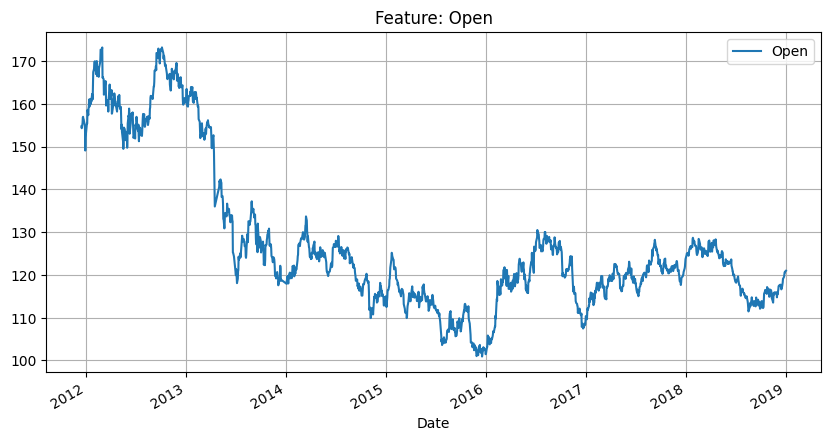

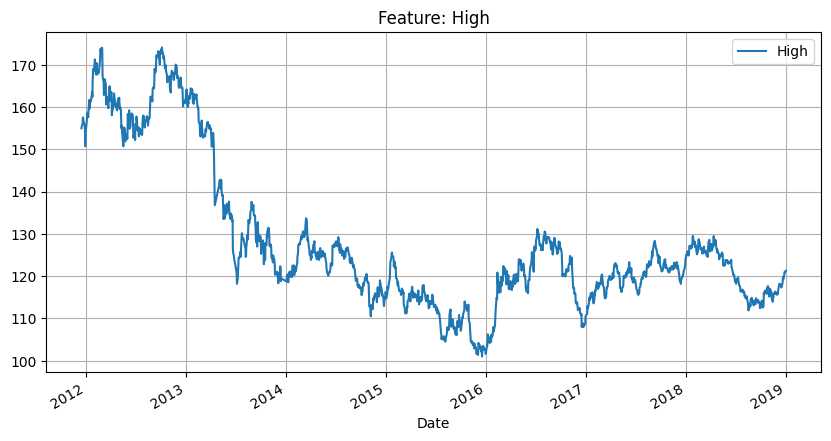

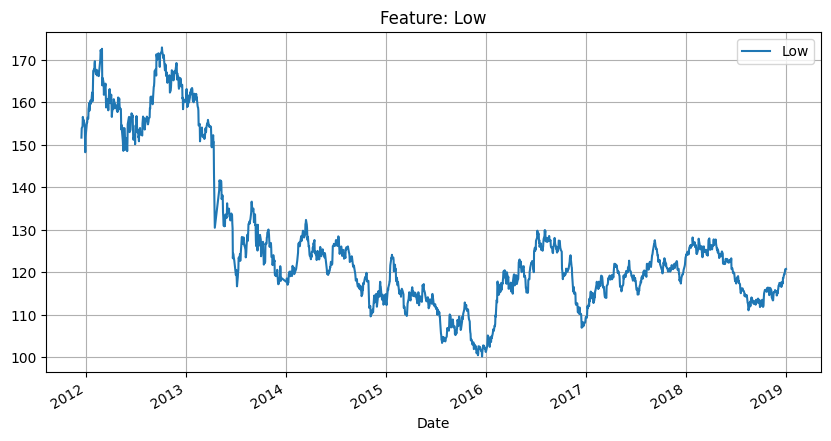

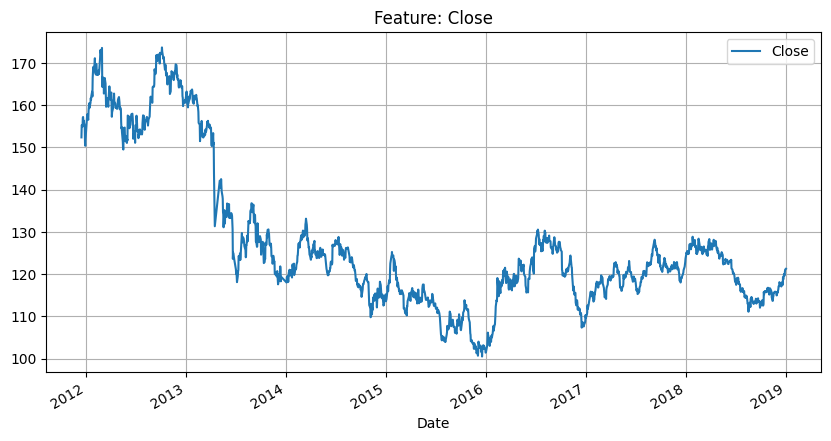

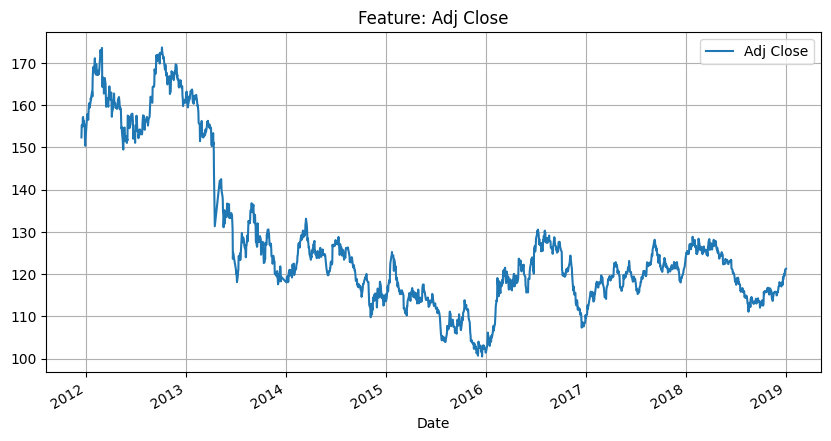

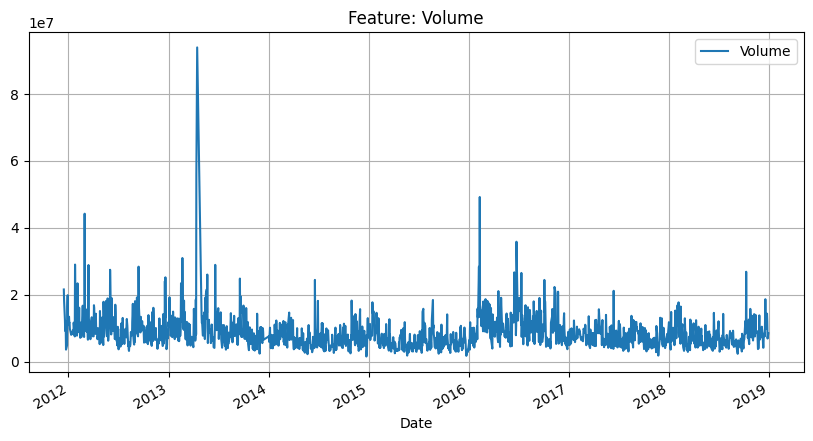

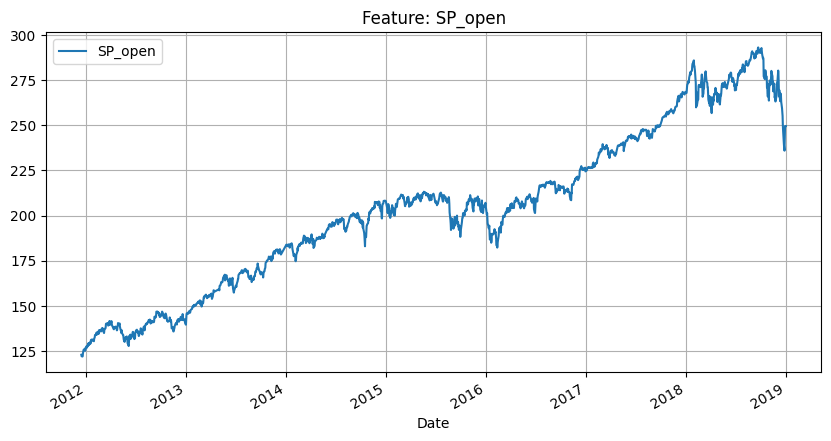

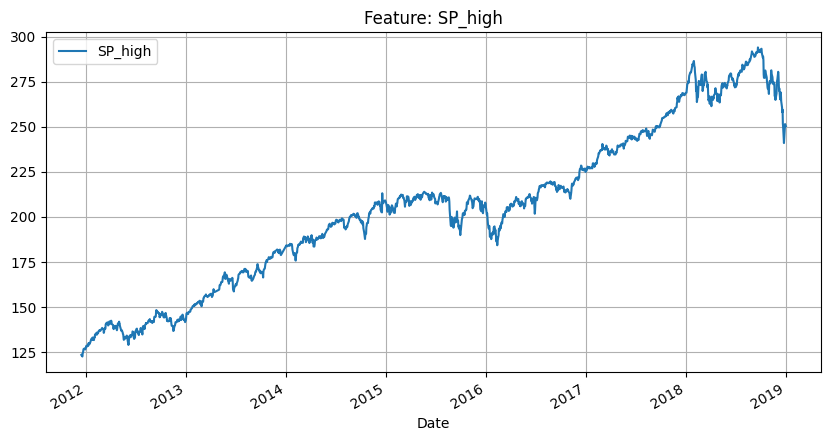

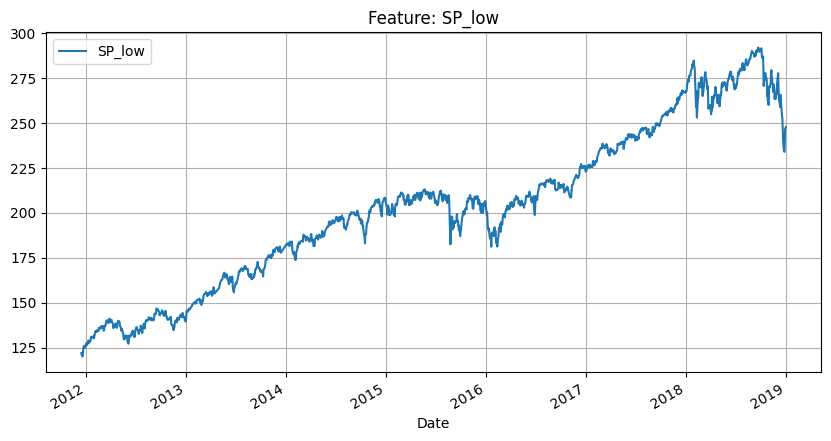

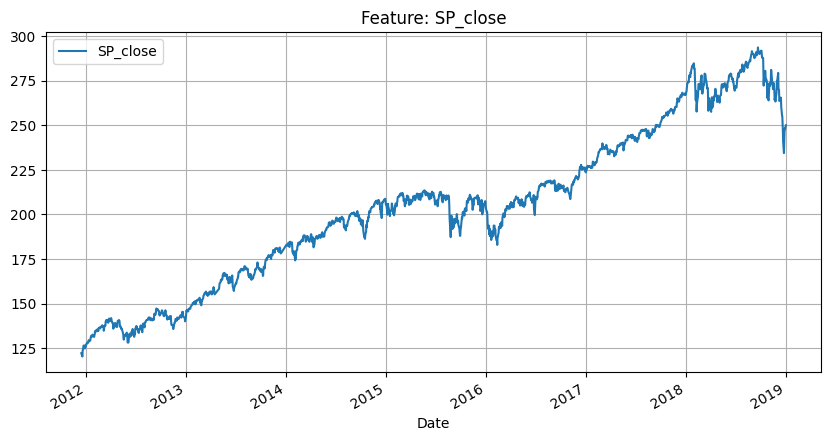

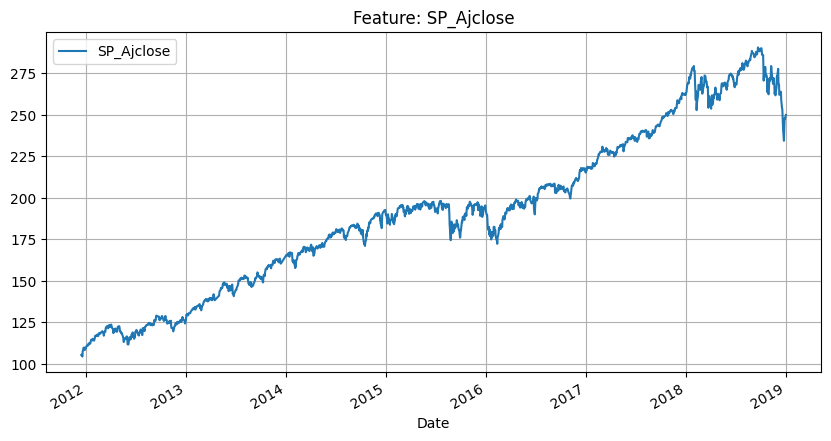

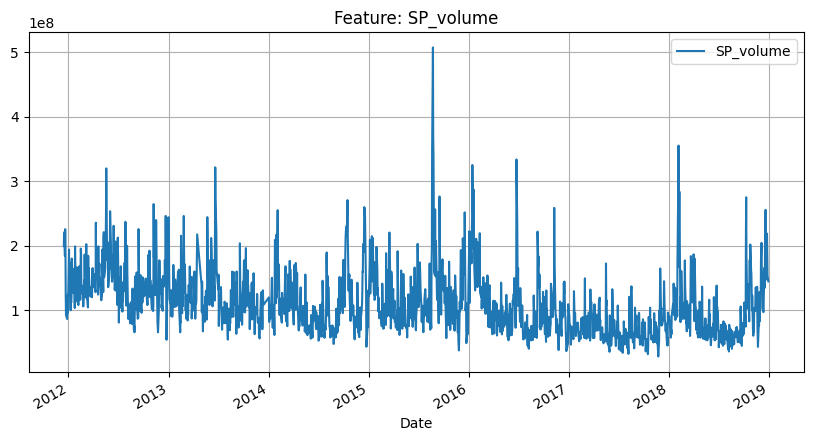

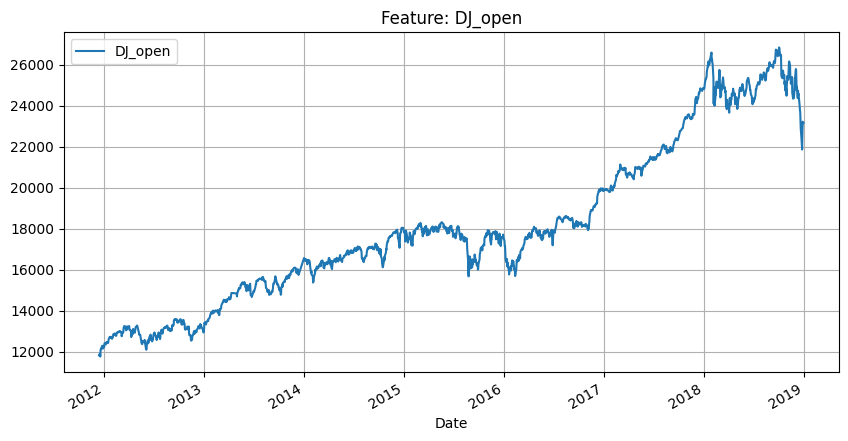

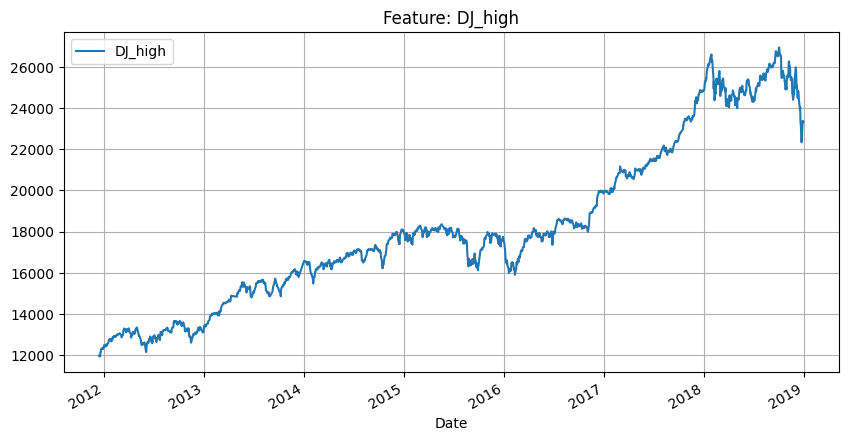

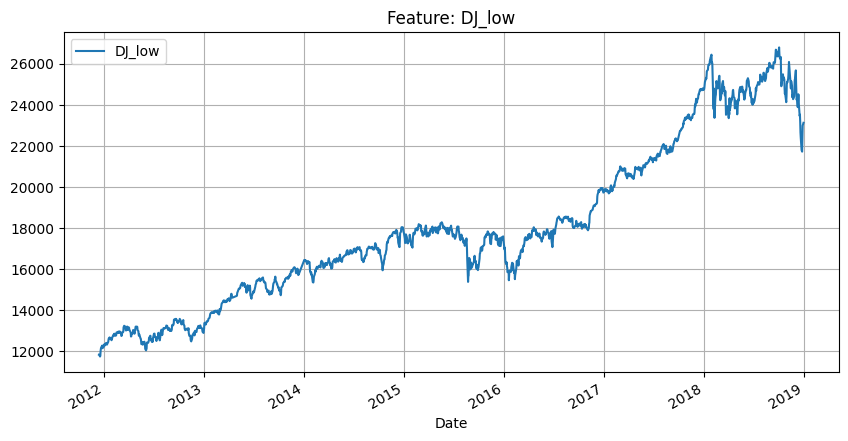

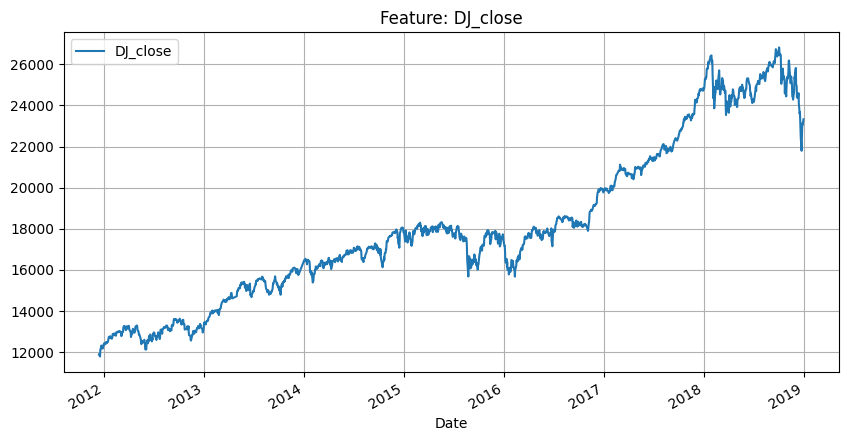

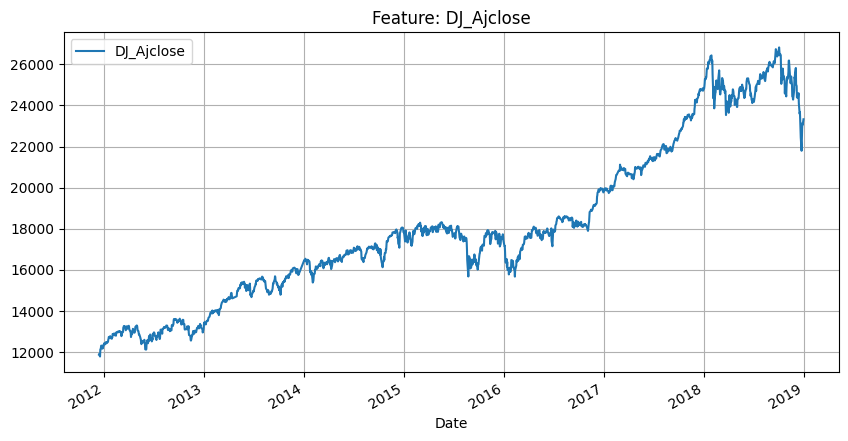

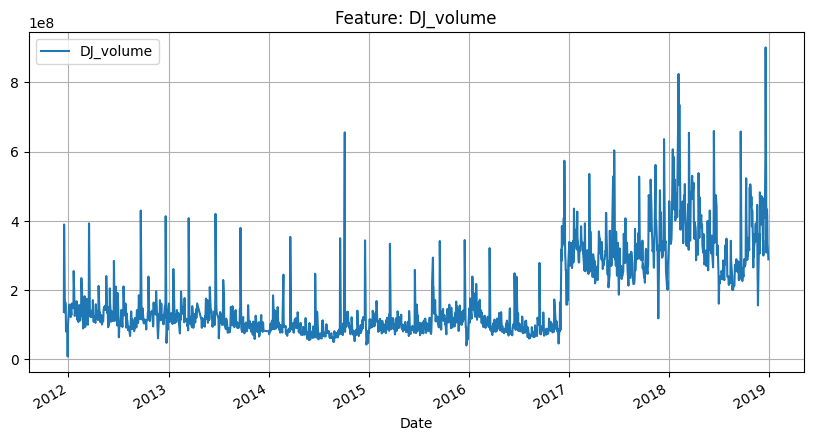

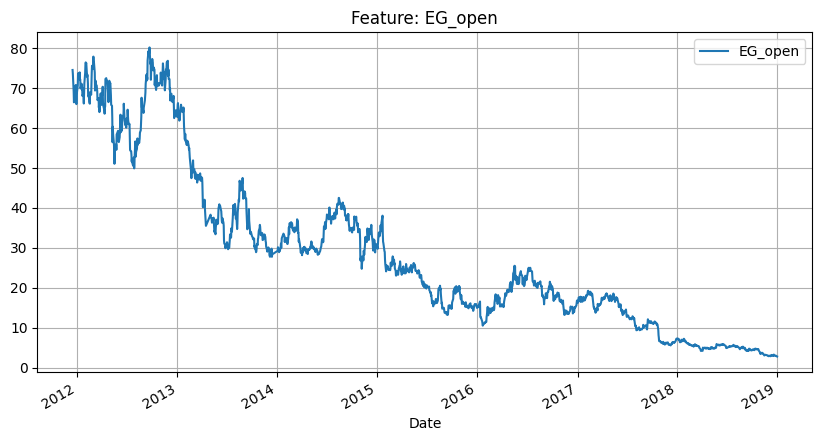

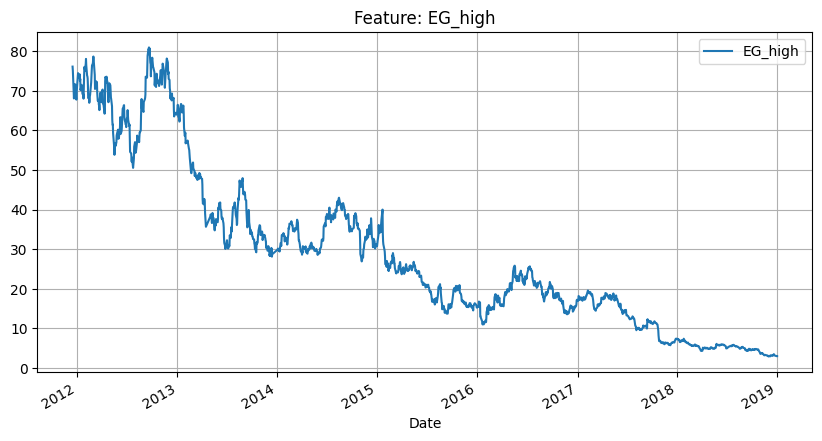

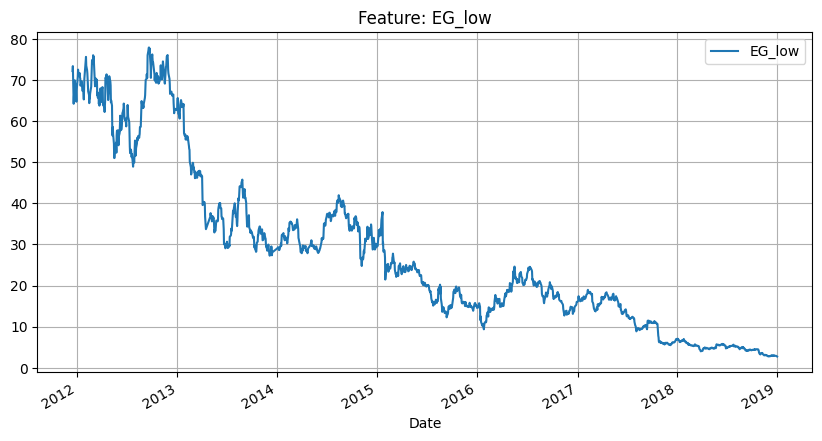

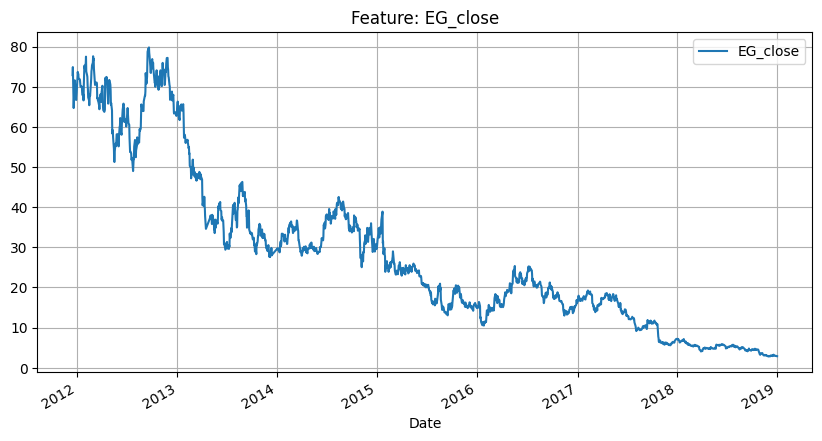

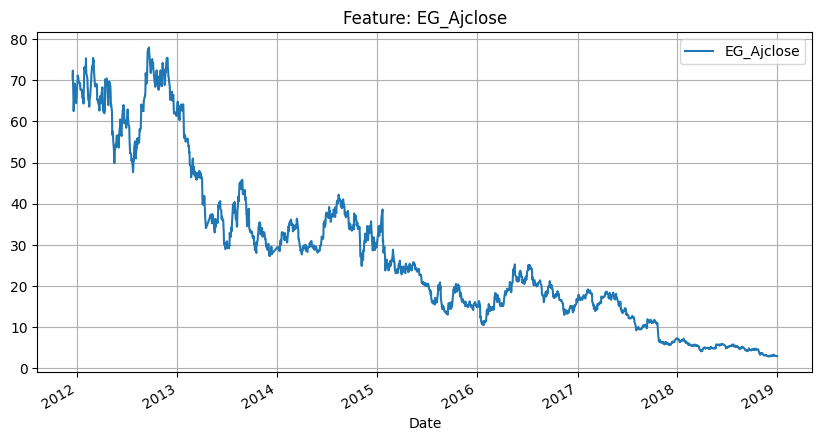

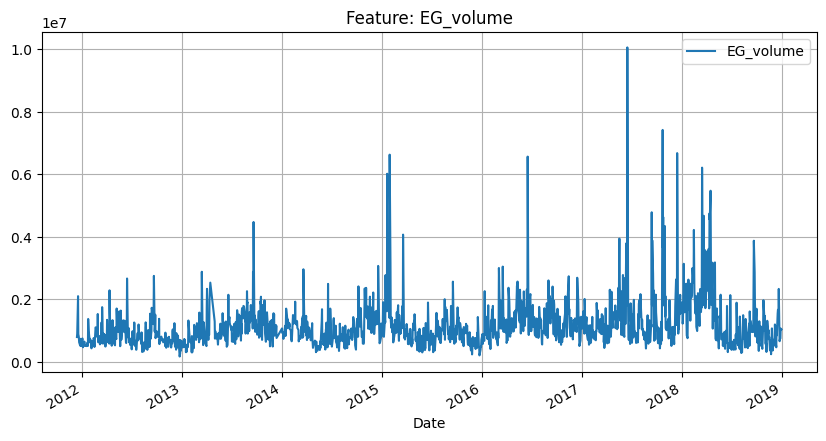

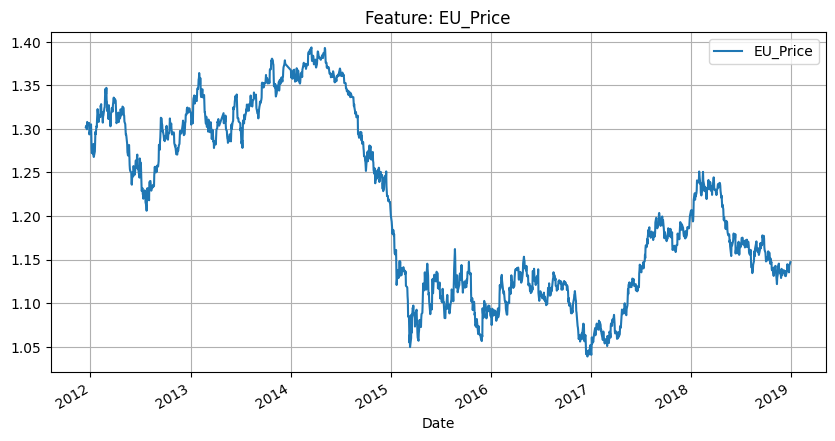

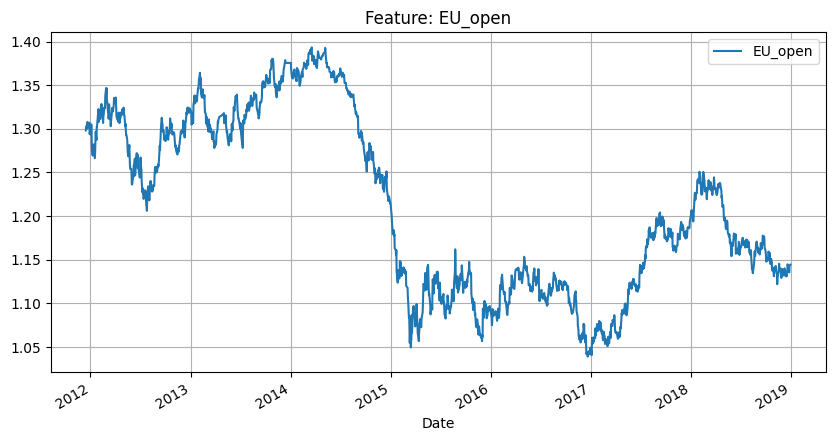

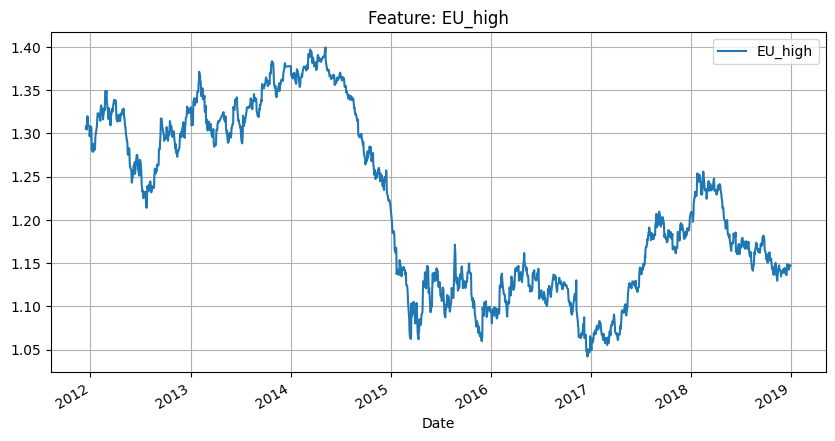

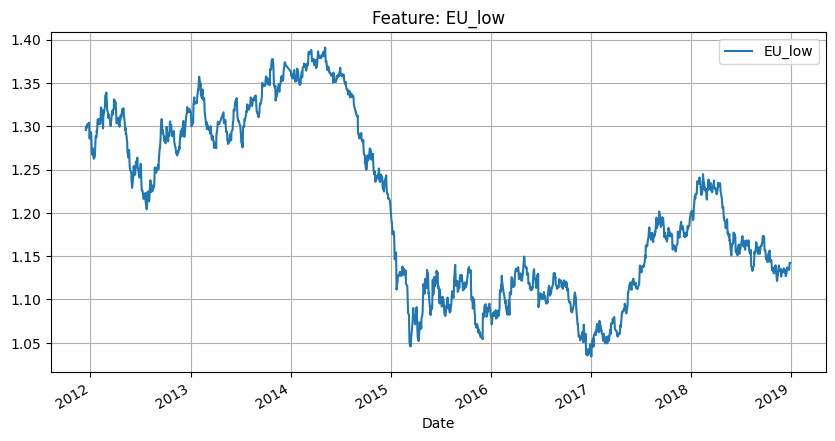

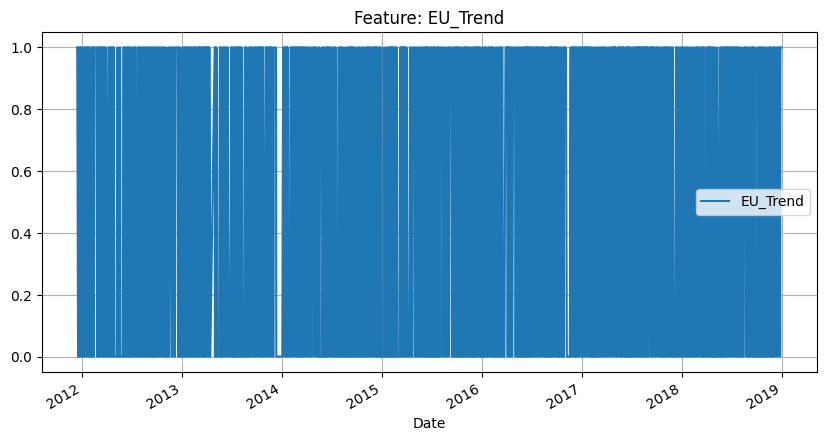

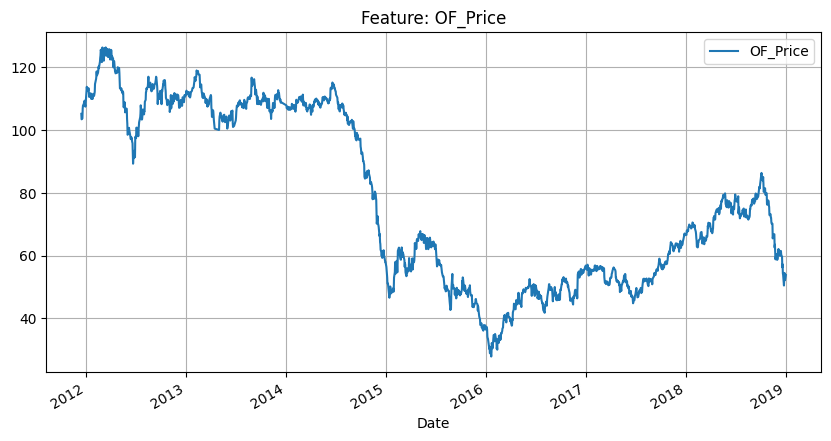

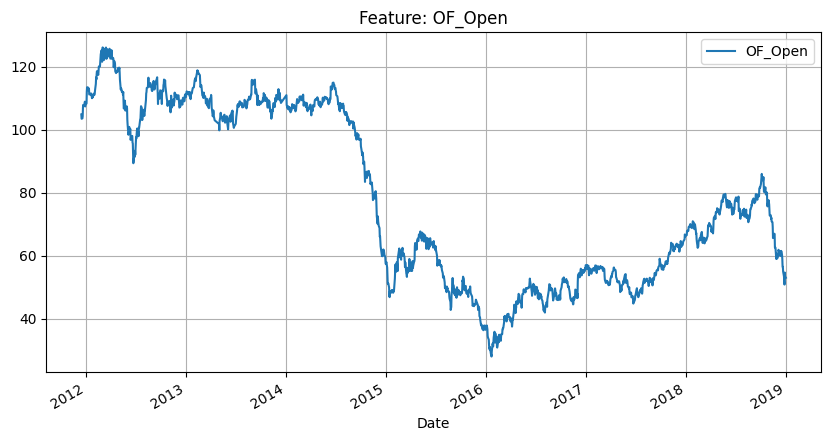

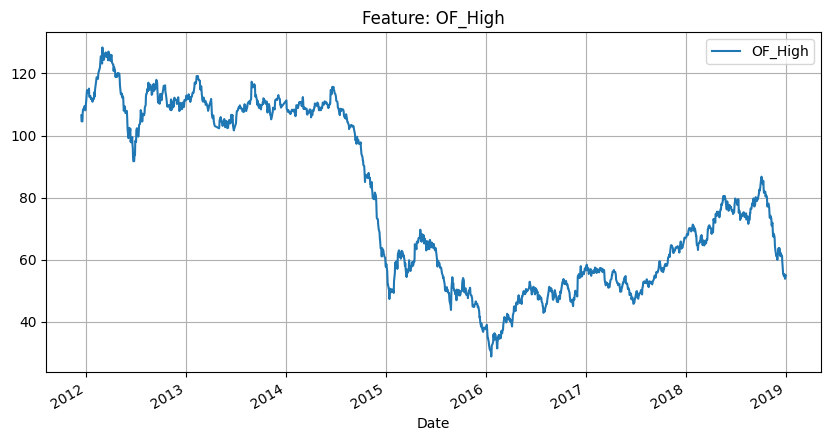

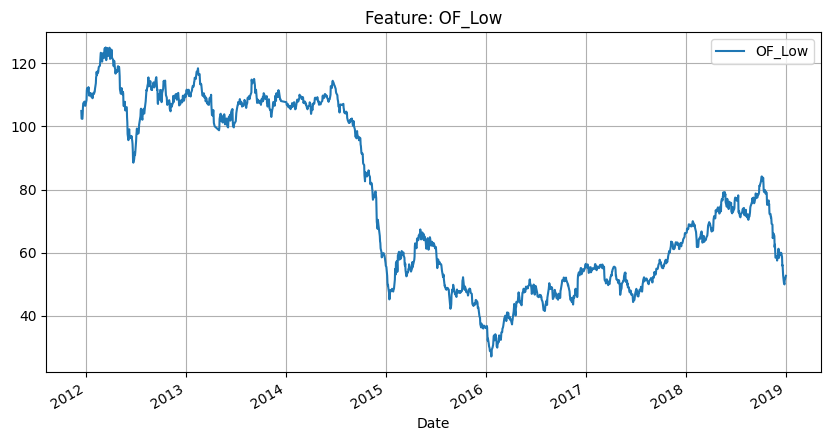

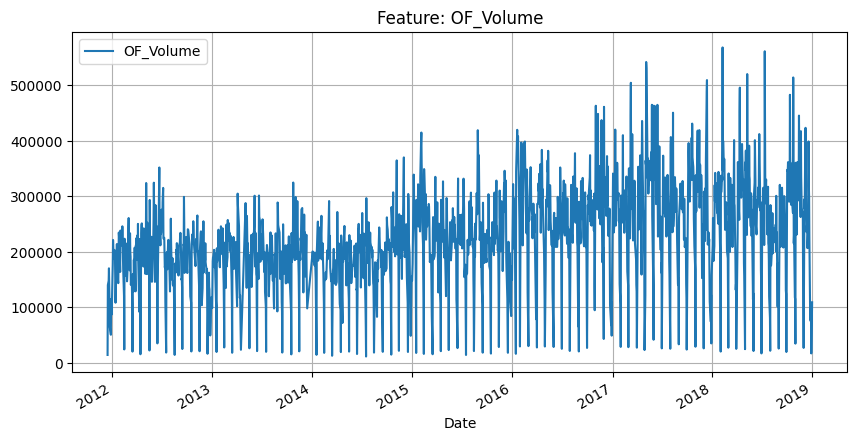

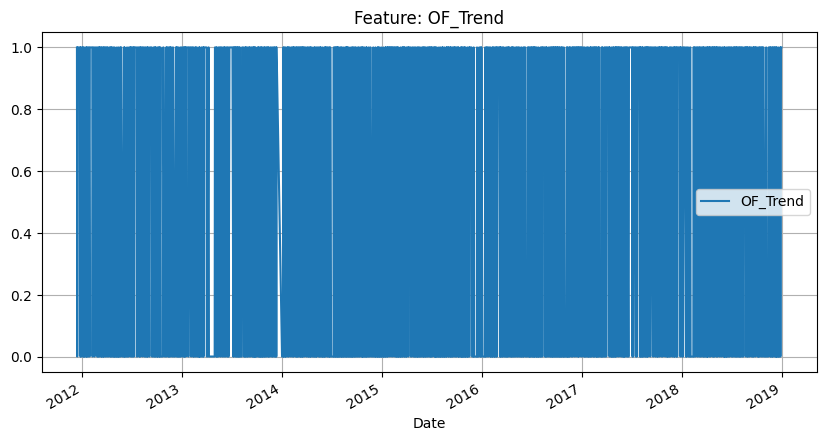

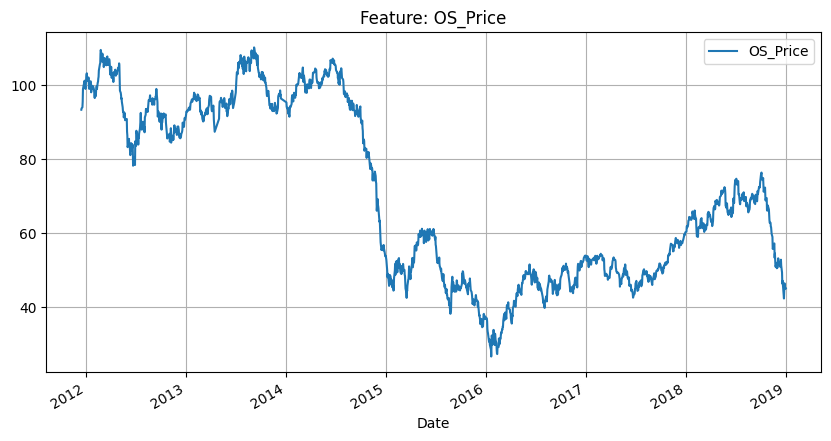

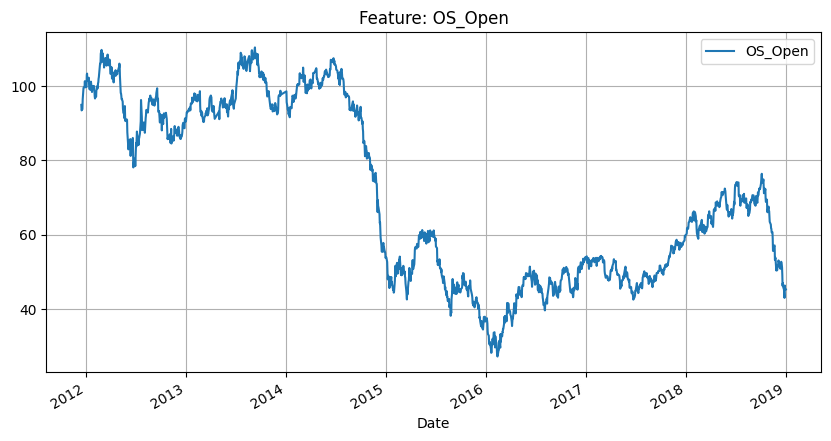

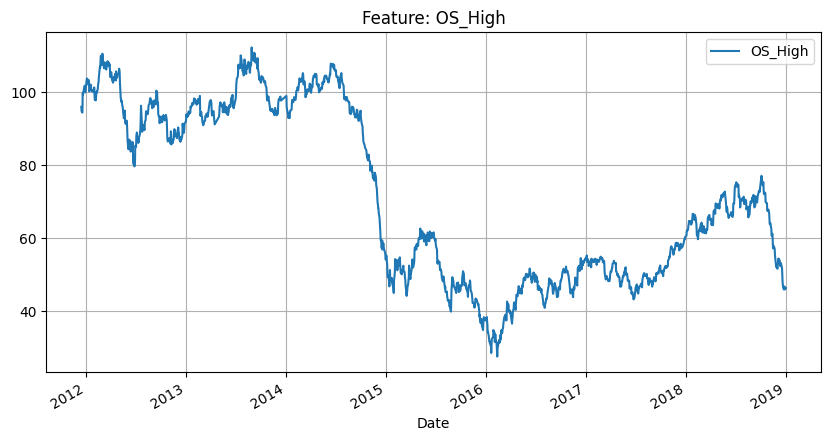

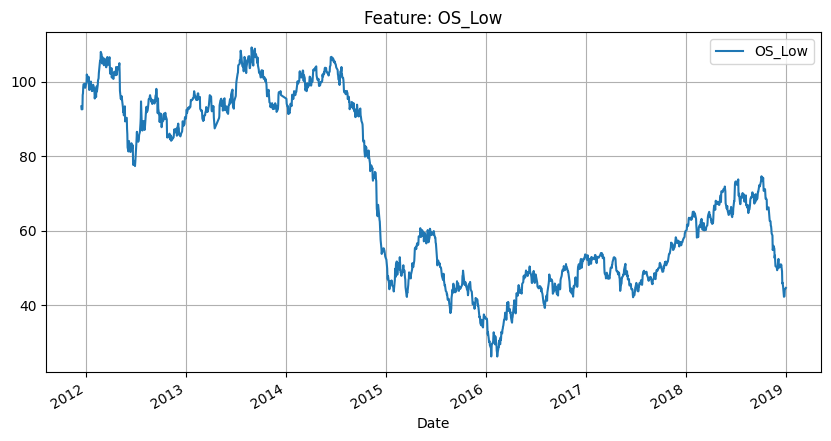

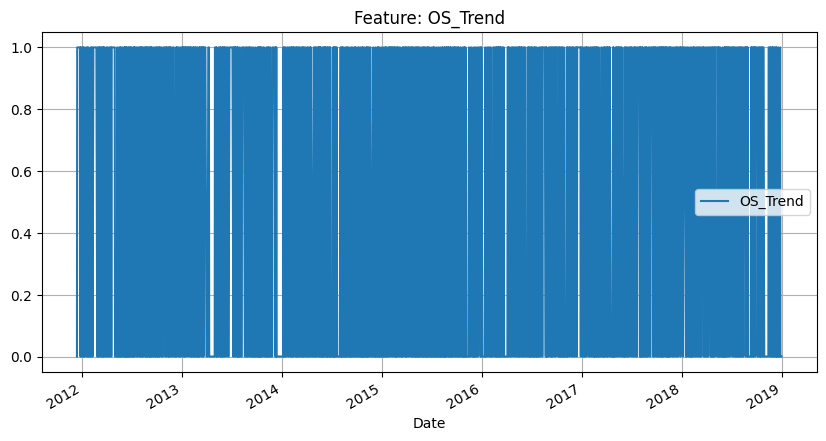

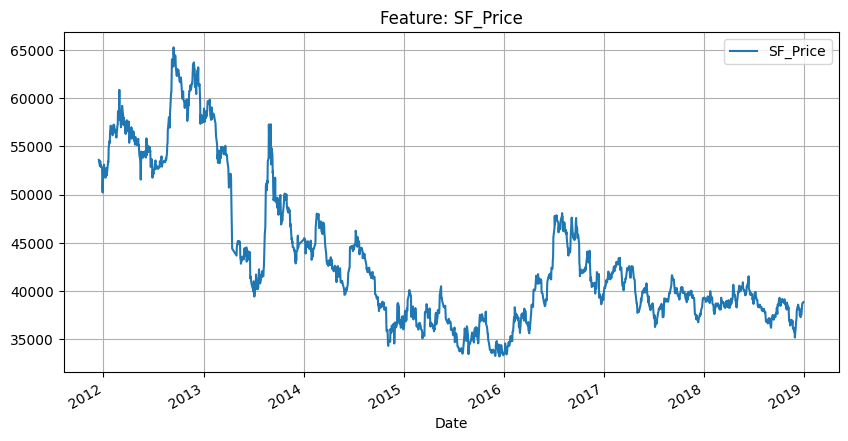

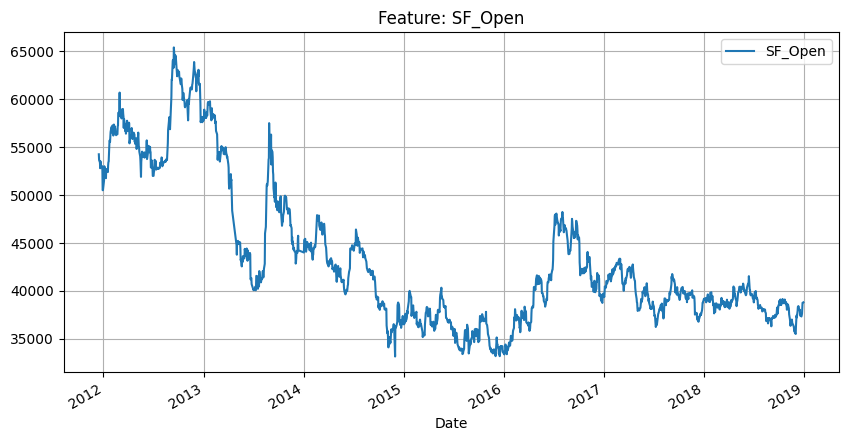

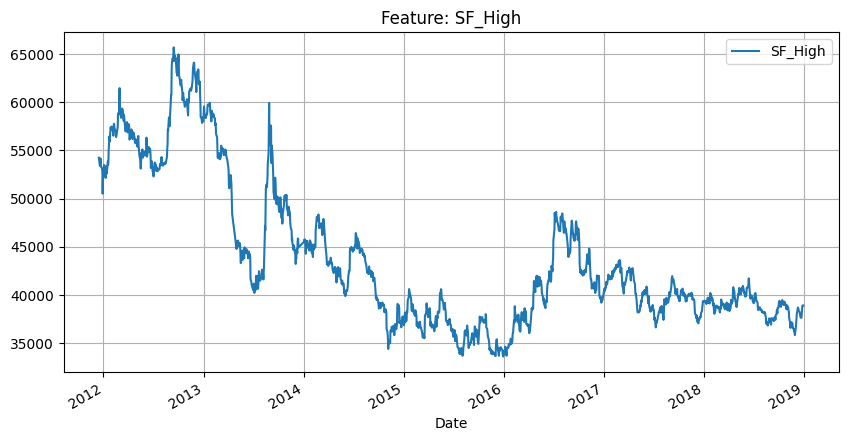

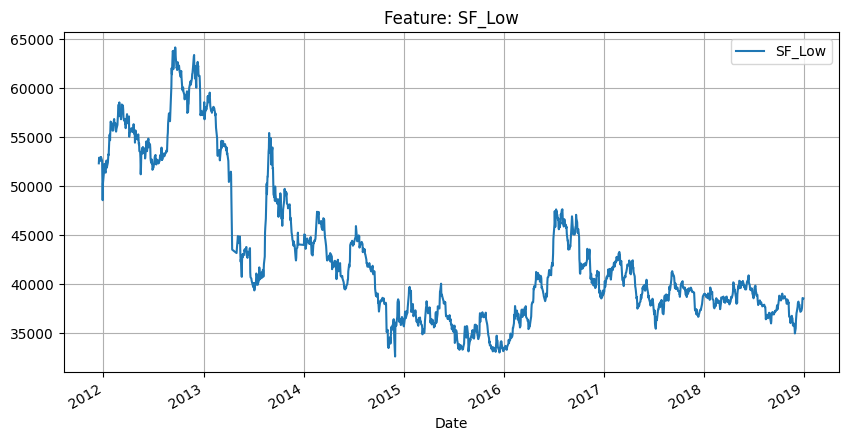

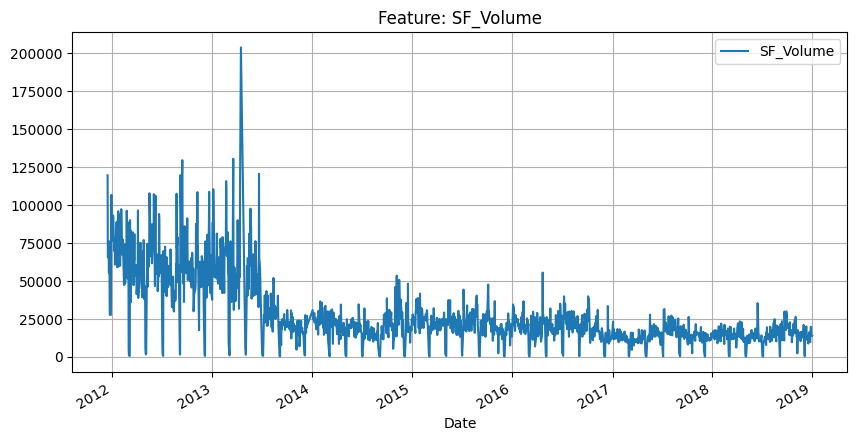

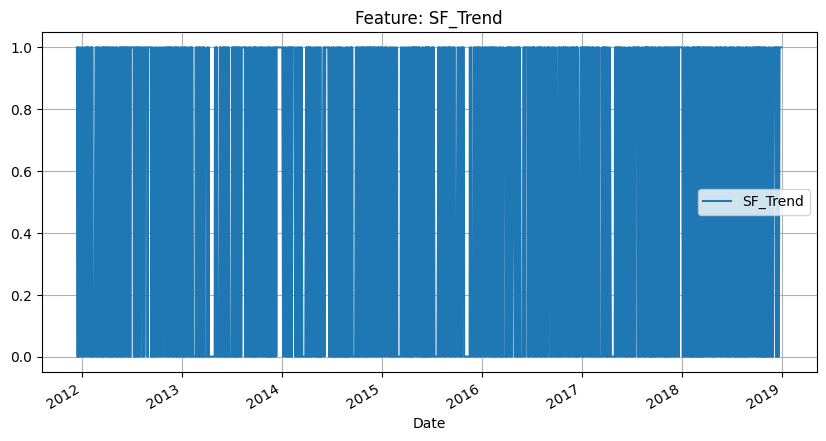

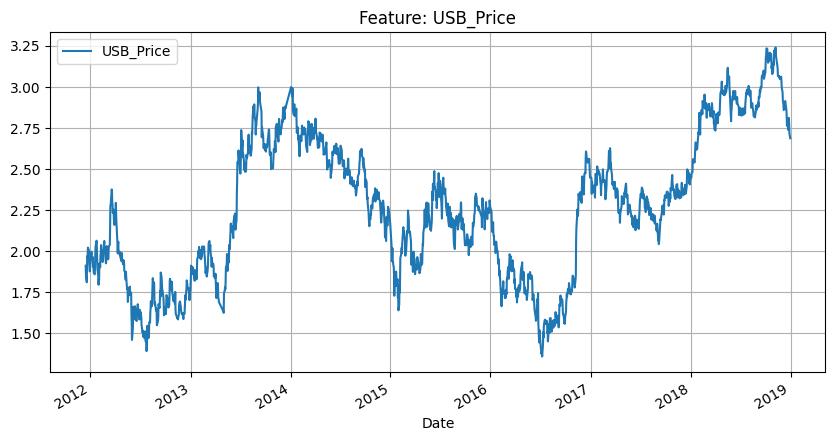

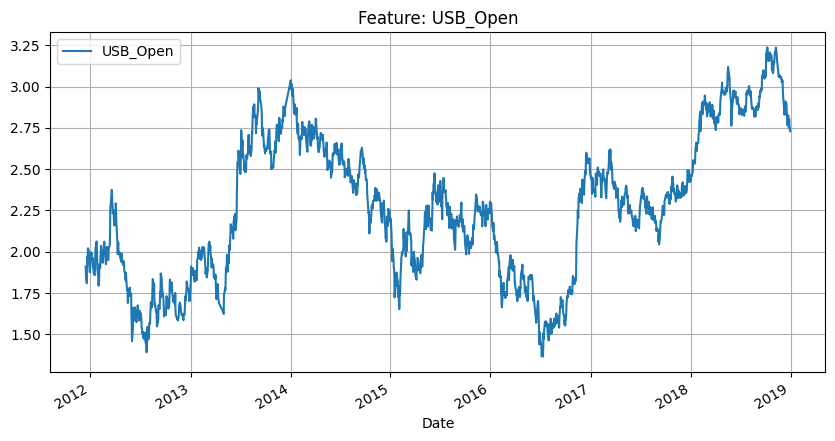

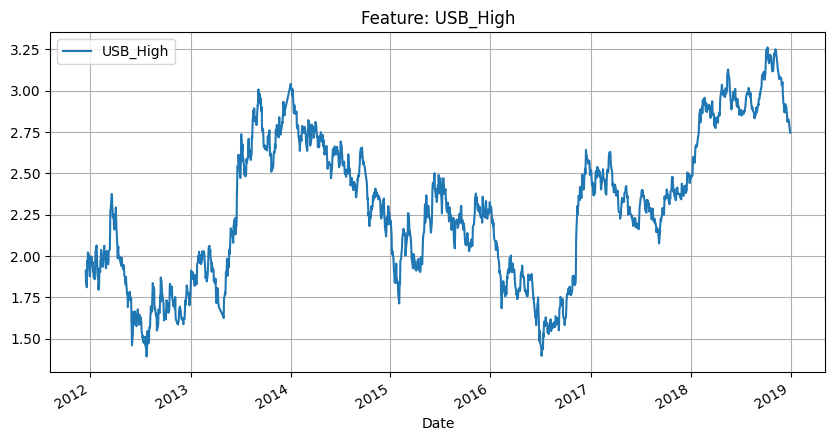

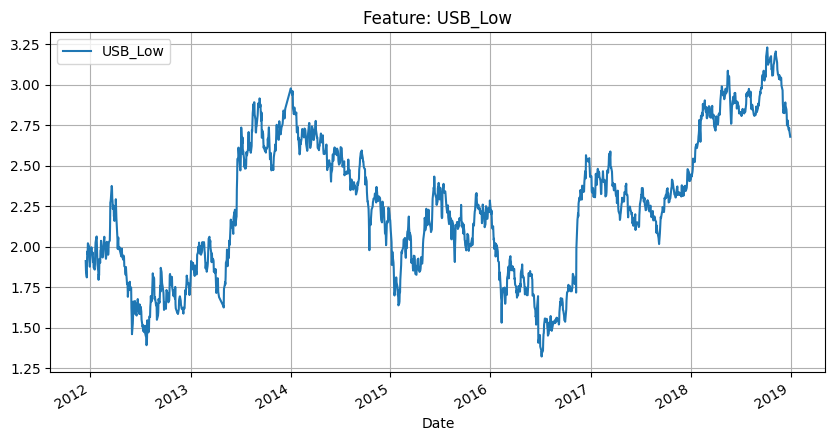

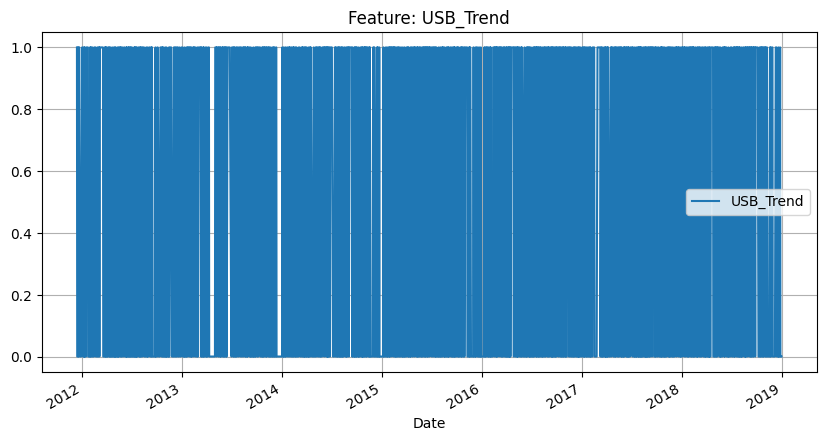

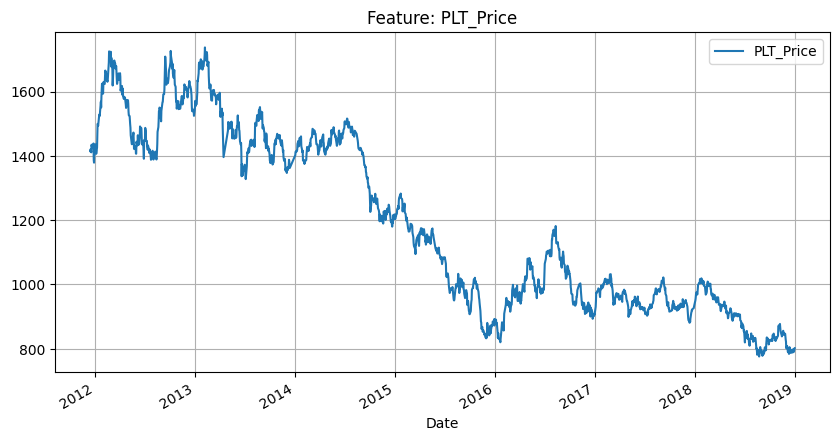

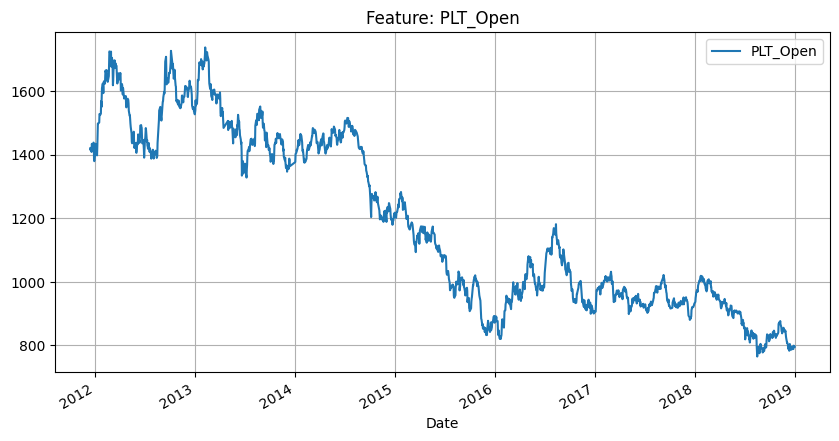

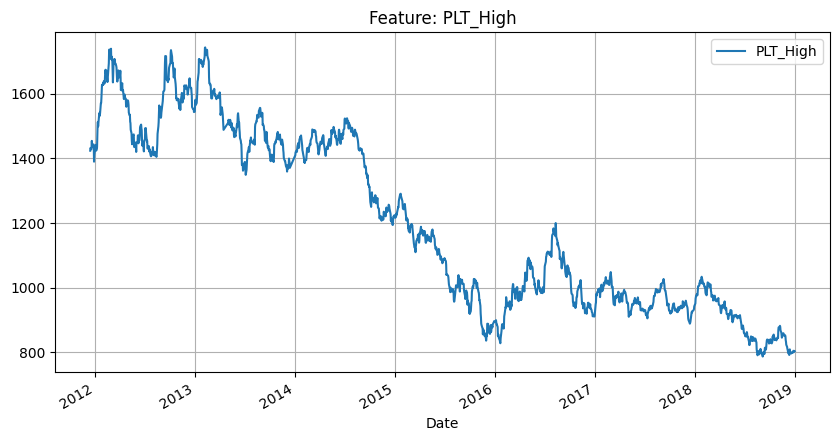

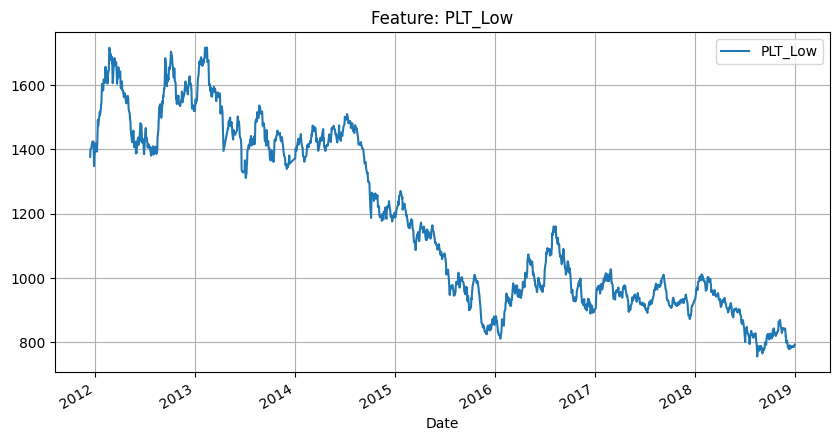

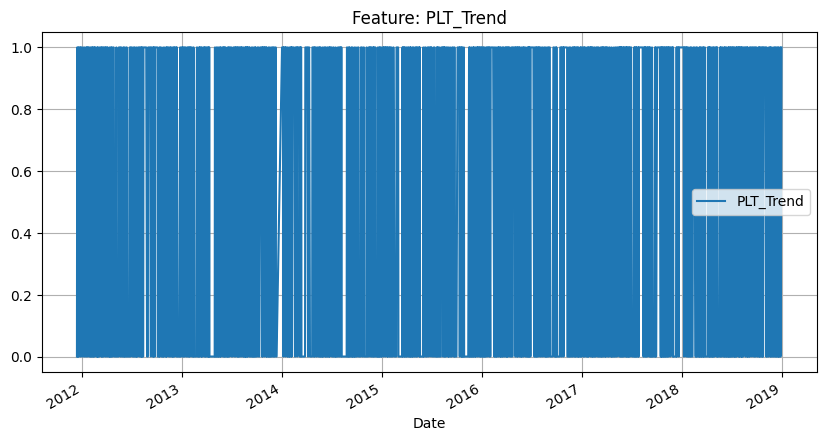

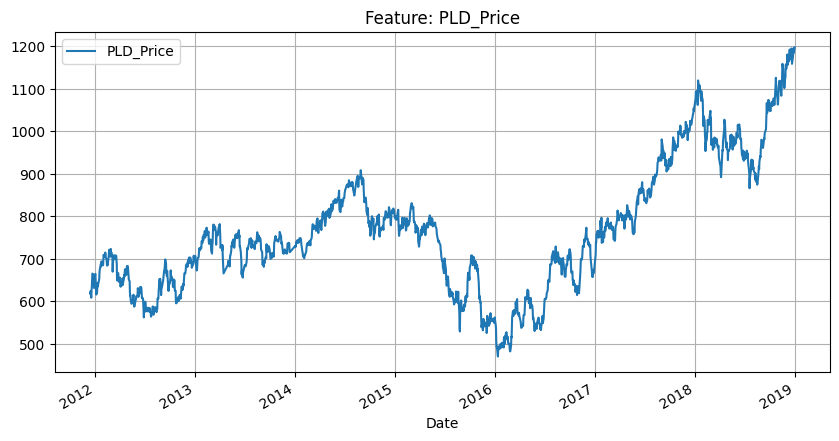

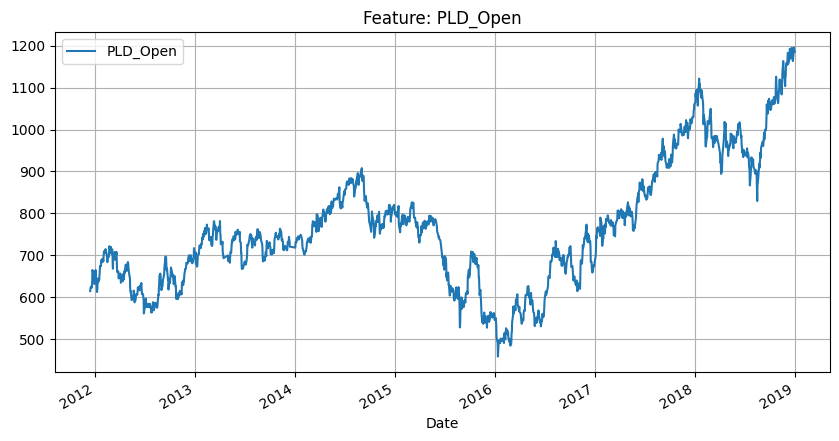

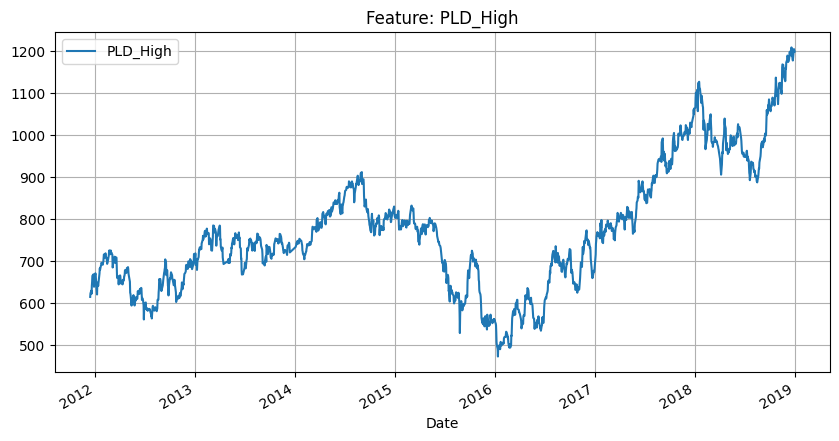

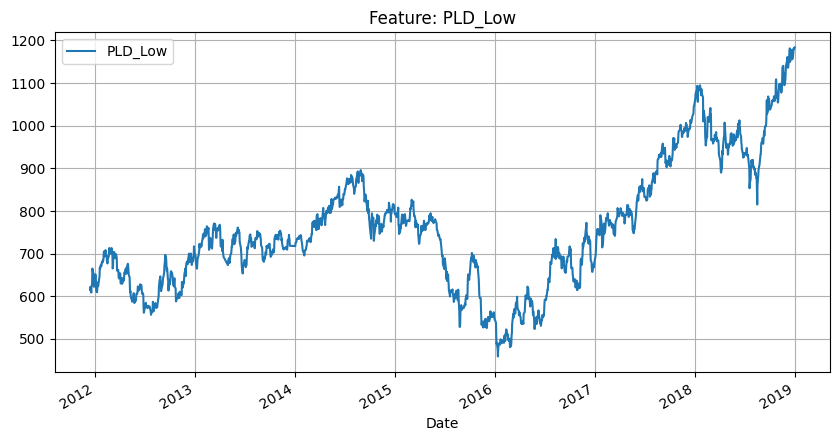

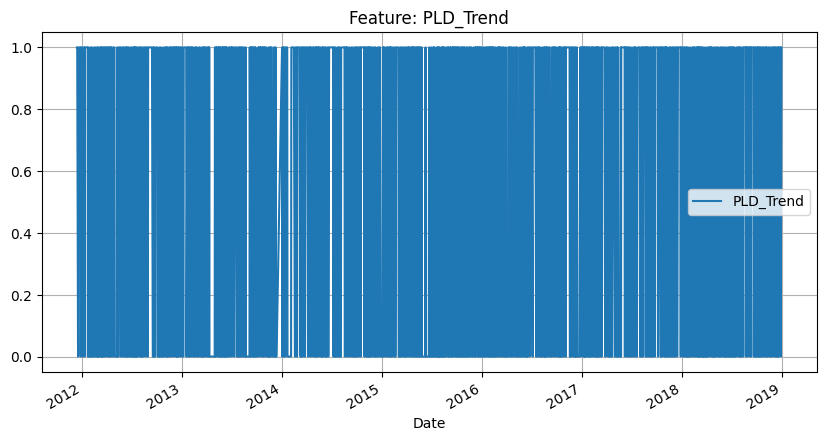

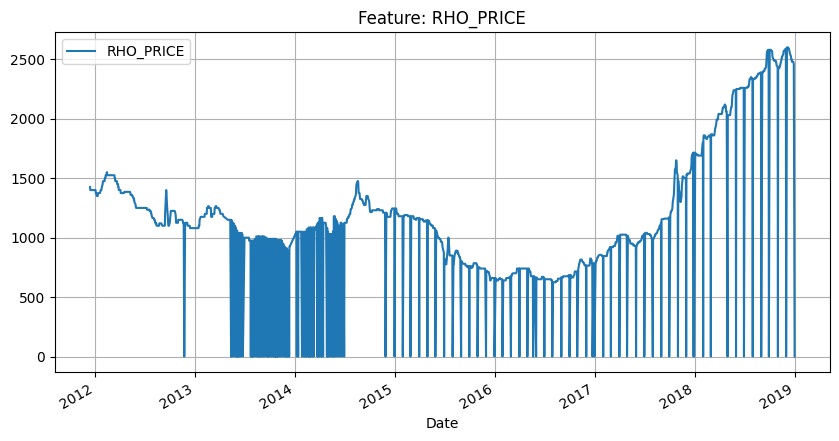

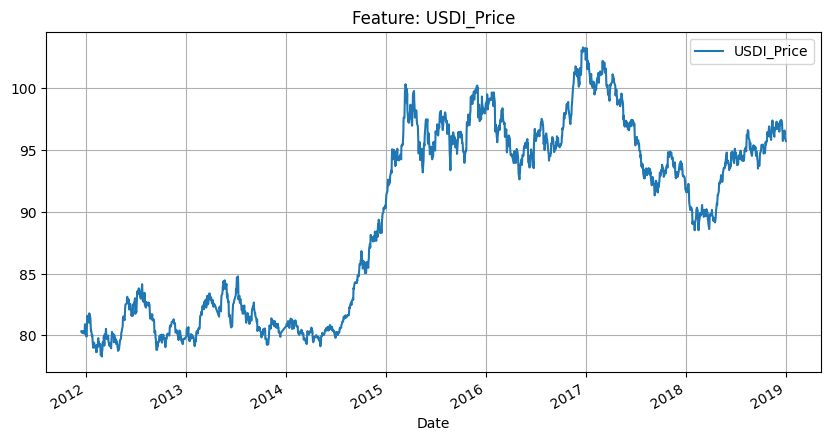

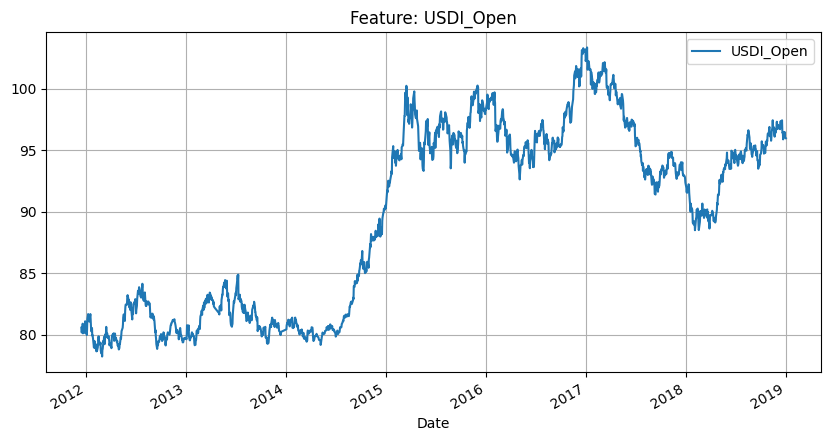

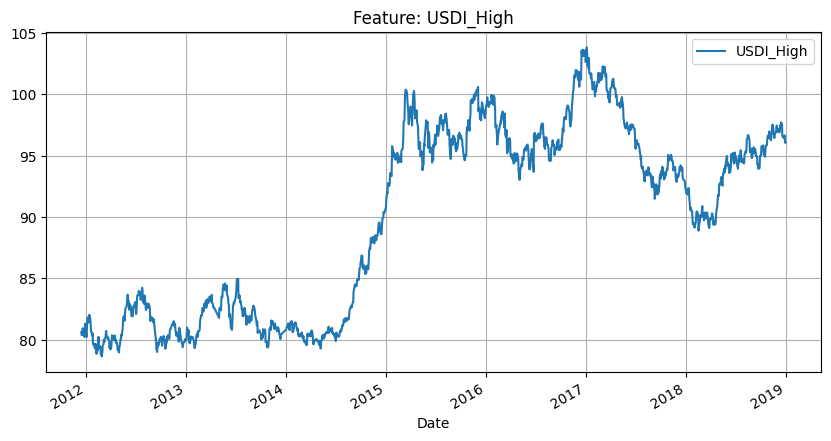

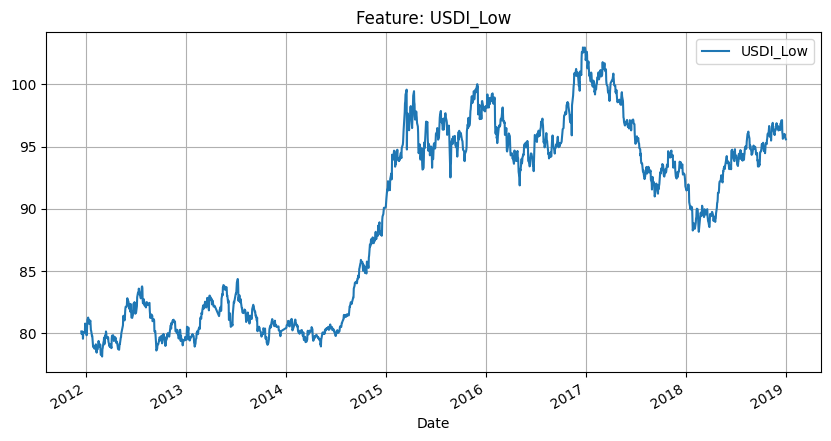

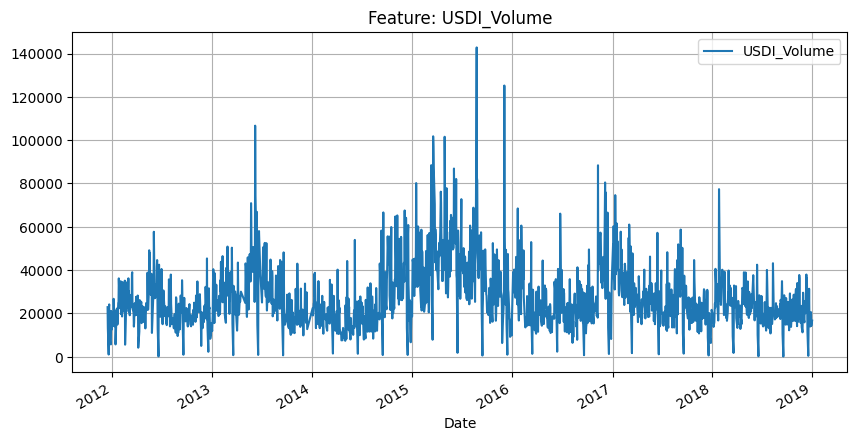

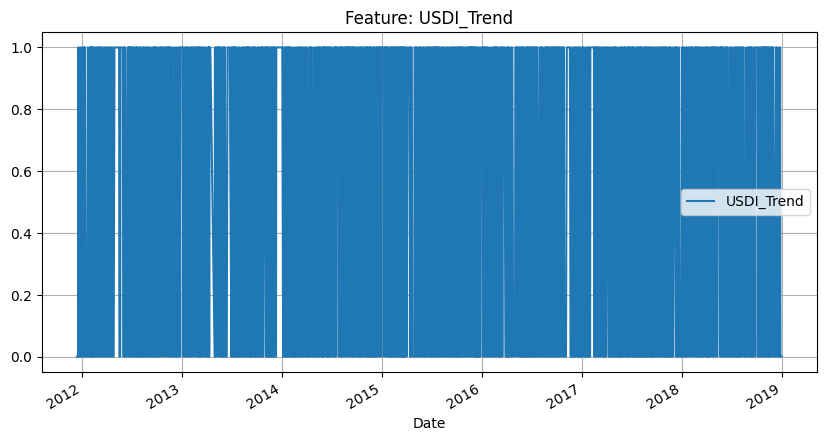

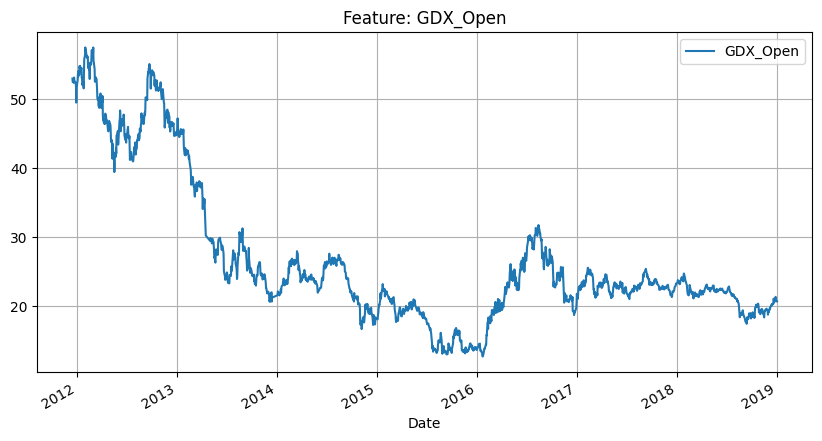

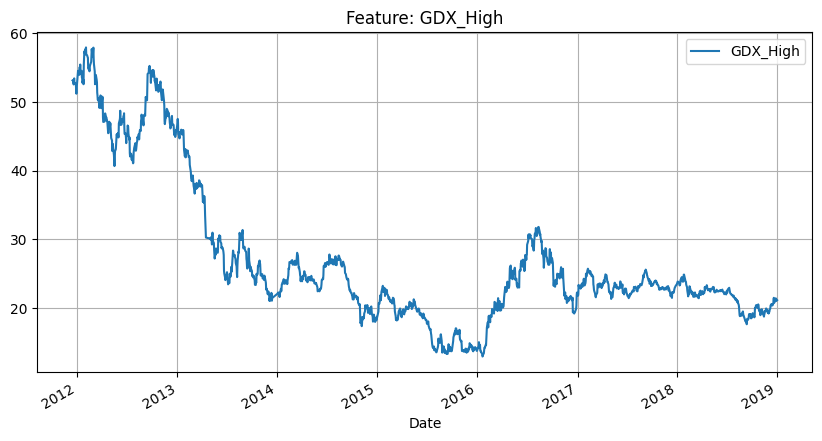

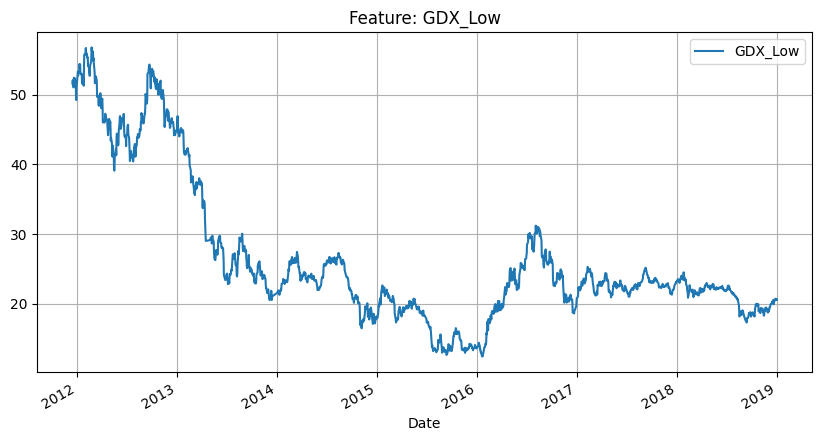

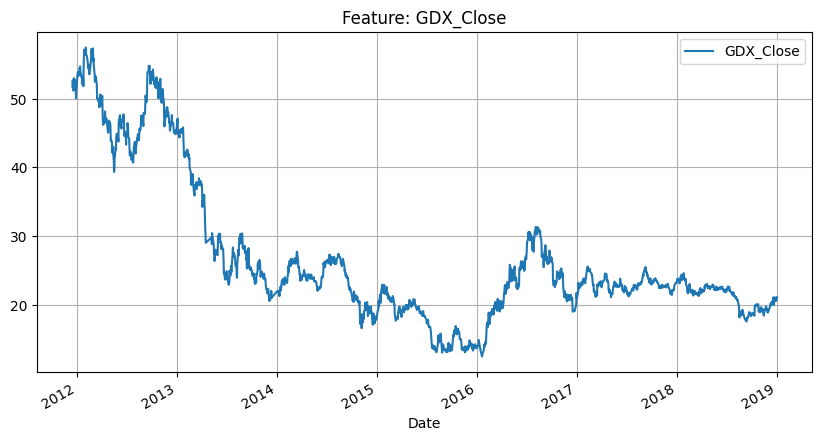

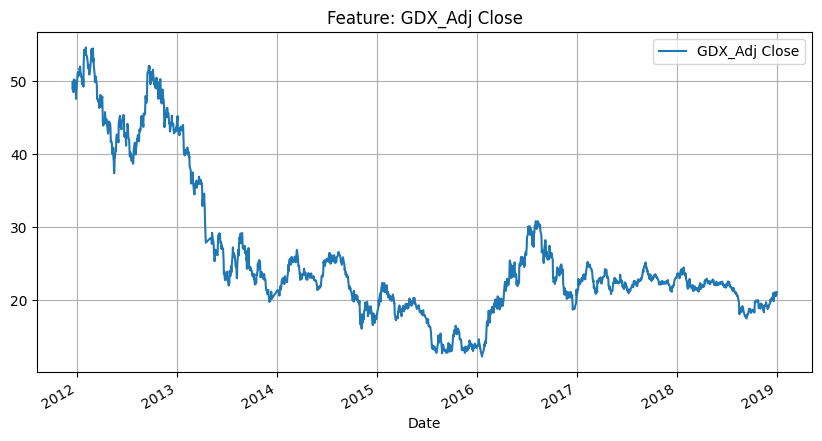

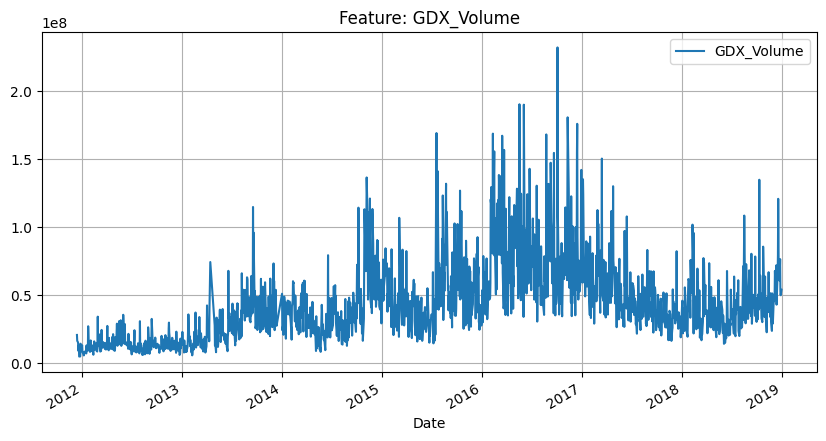

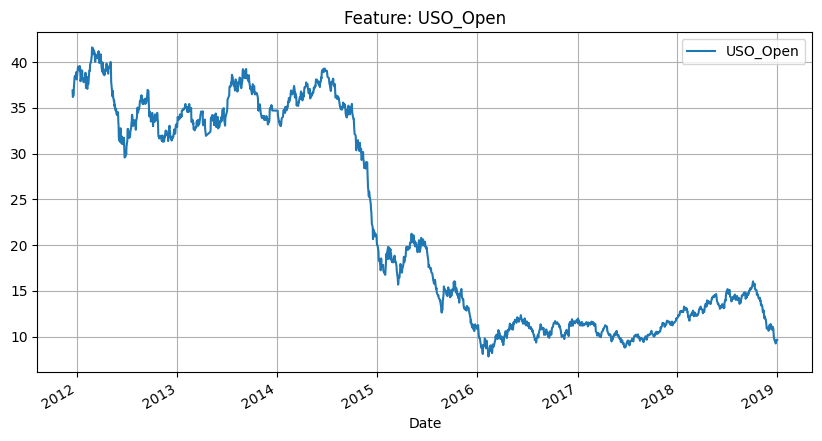

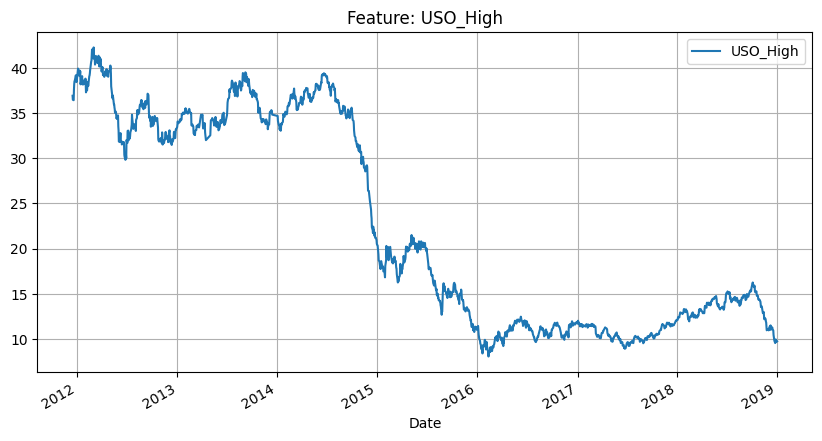

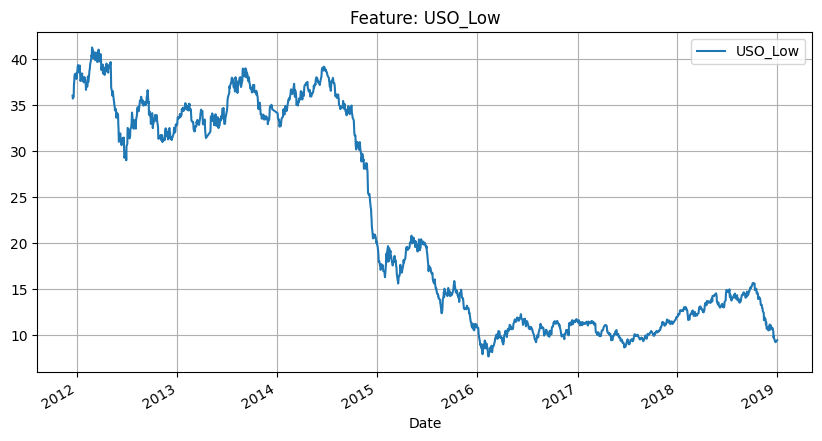

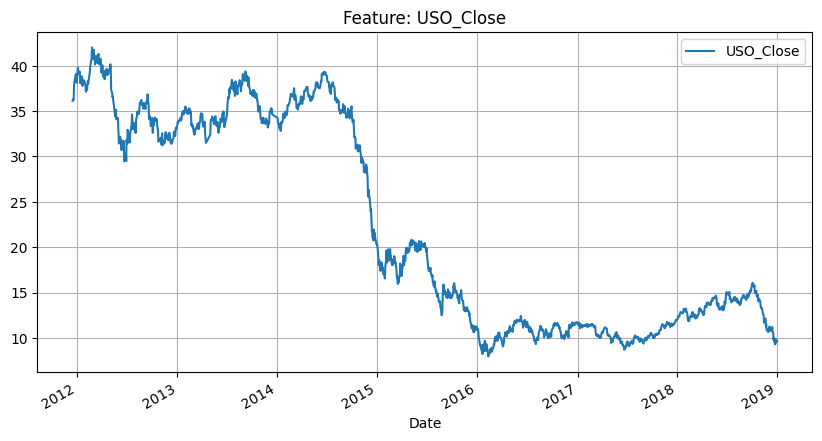

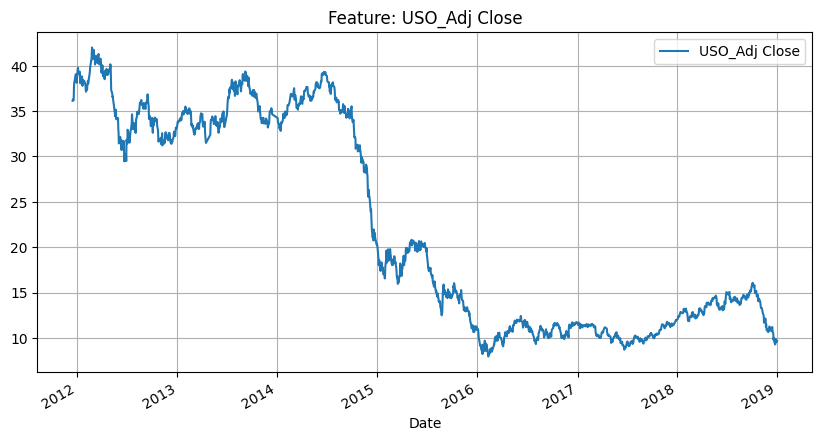

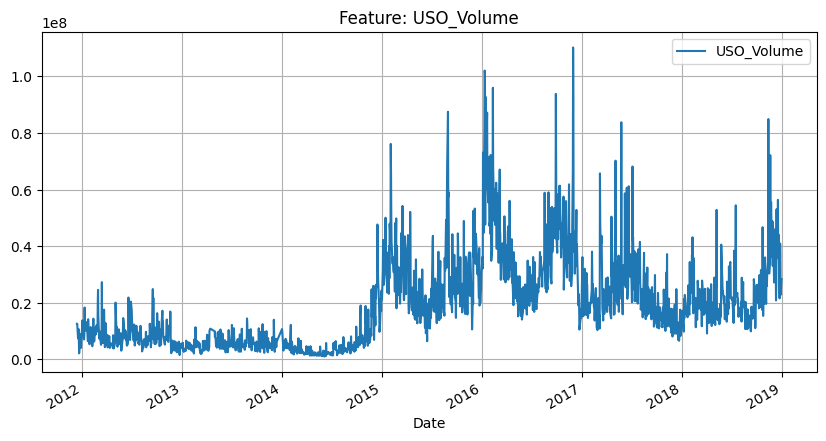

In [5]:
df["Date"] = pd.to_datetime(df["Date"])
columns = list(df.columns)
columns.remove("Date")
for column in columns:
    df[[column, "Date"]].plot(x="Date", y=column, figsize=(10,5), grid=True, title=f"Feature: {column}")
    plt.show()

There are so many features! But, for now we will use only the main features: Open, High, Low, Close

### Preprocessing

First, we need normalize the dataset

In [21]:
df_norm = df[["Open", "High", "Low", "Close"]]
sc_train = MinMaxScaler(feature_range = (0, 1))
sc_target = MinMaxScaler(feature_range = (0, 1))
df_norm = pd.DataFrame(sc_train.fit_transform(df_norm), columns=["Open", "High", "Low", "Close"])
sc_target.fit_transform(df["Close"].values.reshape(-1, 1))

Let's split the data into windows of size 10

The dataset will be splited into two datasets: Train dataset (first 90% from data) and test dataset (last 10% from data)

In [6]:
def preprocessing(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.values
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - seq_len):
        result.append(data[index: index + sequence_length])

    result = np.array(result)
    # Row to divide
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    x_train = train[:, :]
    y_train = train[:, :][:,-1]
    x_test = result[int(row):,:]
    y_test = result[int(row):,][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return x_train, y_train, x_test, y_test, row

In [8]:
window = 10
x_train, y_train, x_test, y_test, offset_to_test = preprocessing(df_norm, window)

In [9]:
df_norm

Date        Open        High         Low       Close   Adj Close  \
0    2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
1    2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2    2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
3    2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
4    2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   
...         ...         ...         ...         ...         ...         ...   
1713 2018-12-24  119.570000  120.139999  119.570000  120.019997  120.019997   
1714 2018-12-26  120.620003  121.000000  119.570000  119.660004  119.660004   
1715 2018-12-27  120.570000  120.900002  120.139999  120.570000  120.570000   
1716 2018-12-28  120.800003  121.080002  120.720001  121.059998  121.059998   
1717 2018-12-31  120.980003  121.260002  120.830002  121.250000  121.250000   

        Volume     SP_open     SP_high      SP_low  ...    GDX_Low  GDX_Close  \
0     21521900  123.029999  123.199997  121.989998  ...  51.570000  51.680000   
1     18124300  122.230003  122.949997  121.300003  ...  52.040001  52.680000   
2     12547200  122.059998  122.320000  120.029999  ...  51.029999  51.169998   
3      9136300  122.180000  124.139999  120.370003  ...  52.369999  52.990002   
4     11996100  123.930000  124.360001  122.750000  ...  52.419998  52.959999   
...        ...         ...         ...         ...  ...        ...        ...   
1713   9736400  239.039993  240.839996  234.270004  ...  20.650000  21.090000   
1714  14293500  235.970001  246.179993  233.759995  ...  20.530001  20.620001   
1715  11874400  242.570007  248.289993  238.960007  ...  20.700001  20.969999   
1716   6864700  249.580002  251.399994  246.449997  ...  20.570000  20.600000   
1717   8449400  249.559998  250.190002  247.470001  ...  20.559999  21.090000   

      GDX_Adj Close  GDX_Volume   USO_Open   USO_High    USO_Low  USO_Close  \
0         48.973877    20605600  36.900002  36.939999  36.049999  36.130001   
1         49.921513    16285400  36.180000  36.500000  35.730000  36.270000   
2         48.490578    15120200  36.389999  36.450001  35.930000  36.200001   
3         50.215282    11644900  37.299999  37.610001  37.220001  37.560001   
4         50.186852     8724300  37.669998  38.240002  37.520000  38.110001   
...             ...         ...        ...        ...        ...        ...   
1713      21.090000    60507000   9.490000   9.520000   9.280000   9.290000   
1714      20.620001    76365200   9.250000   9.920000   9.230000   9.900000   
1715      20.969999    52393000   9.590000   9.650000   9.370000   9.620000   
1716      20.600000    49835000   9.540000   9.650000   9.380000   9.530000   
1717      21.090000    53866600   9.630000   9.710000   9.440000   9.660000   

      USO_Adj Close  USO_Volume  
0         36.130001    12616700  
1         36.270000    12578800  
2         36.200001     7418200  
3         37.560001    10041600  
4         38.110001    10728000  
...             ...         ...  
1713       9.290000    21598200  
1714       9.900000    40978800  
1715       9.620000    36578700  
1716       9.530000    22803400  
1717       9.660000    28417400  

[1718 rows x 81 columns]

Building the LSTM model

In [10]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [11]:
x_train.shape

(1537, 11, 4)

In [12]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(window,4)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 50)            11000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 51,451
Trainable params: 51,451
Non-trainable params: 0
_________________________________________________________________


Training the model

In [14]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
49/49 [==============================] - 31s 19ms/step - loss: 0.0383
Epoch 2/10
49/49 [==============================] - 1s 18ms/step - loss: 0.0015
Epoch 3/10
49/49 [==============================] - 1s 17ms/step - loss: 0.0018
Epoch 4/10
49/49 [==============================] - 1s 17ms/step - loss: 0.0013
Epoch 5/10
49/49 [==============================] - 1s 18ms/step - loss: 0.0013
Epoch 6/10
49/49 [==============================] - 1s 17ms/step - loss: 0.0011
Epoch 7/10
49/49 [==============================] - 1s 19ms/step - loss: 0.0012
Epoch 8/10
49/49 [==============================] - 1s 18ms/step - loss: 0.0012
Epoch 9/10
49/49 [==============================] - 1s 18ms/step - loss: 0.0024
Epoch 10/10
49/49 [==============================] - 1s 18ms/step - loss: 0.0012


Let's use the model to predict the last 10% instances from dataset

In [15]:
test_predict=model.predict(x_test)

In [16]:
test_predict[:5]

array([[0.37402654],
       [0.36994243],
       [0.36669347],
       [0.36274964],
       [0.3579549 ]], dtype=float32)

In [17]:
len(test_predict)

171

We need to apply the inverse transform normalization to get the real values

In [18]:
test_predict = sc_target.inverse_transform(test_predict)

And plot this...

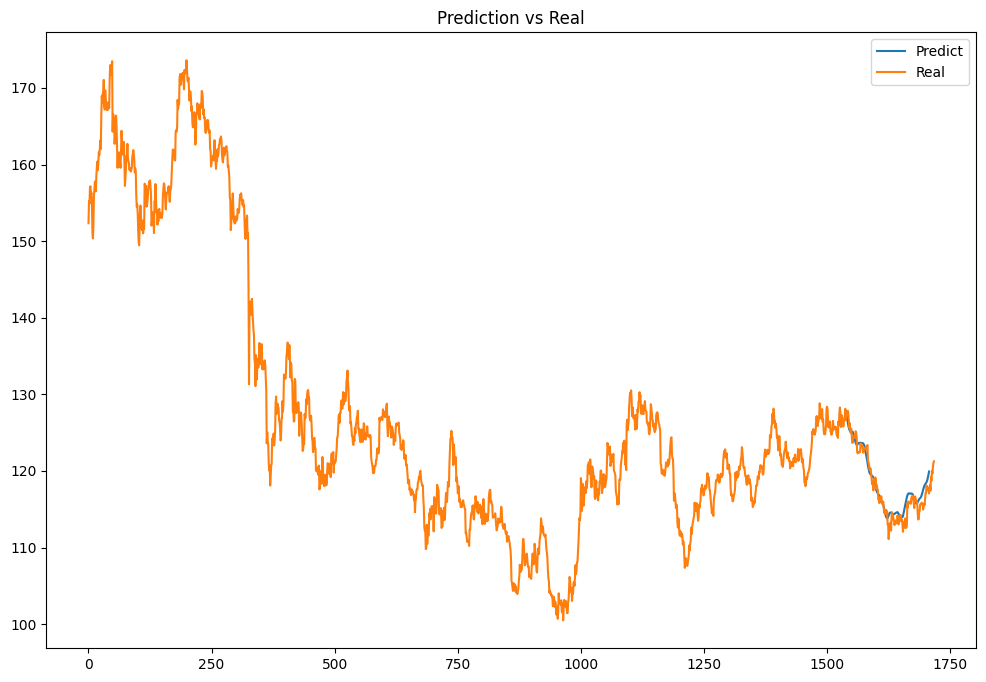

In [19]:
plt.figure(figsize=(12,8))
plt.plot(range(offset_to_test, len(df)-window), test_predict, label="Predict")
plt.plot(df["Close"], label="Real")
plt.legend()
plt.title("Prediction vs Real")
plt.show()

So, let's see the graph closer

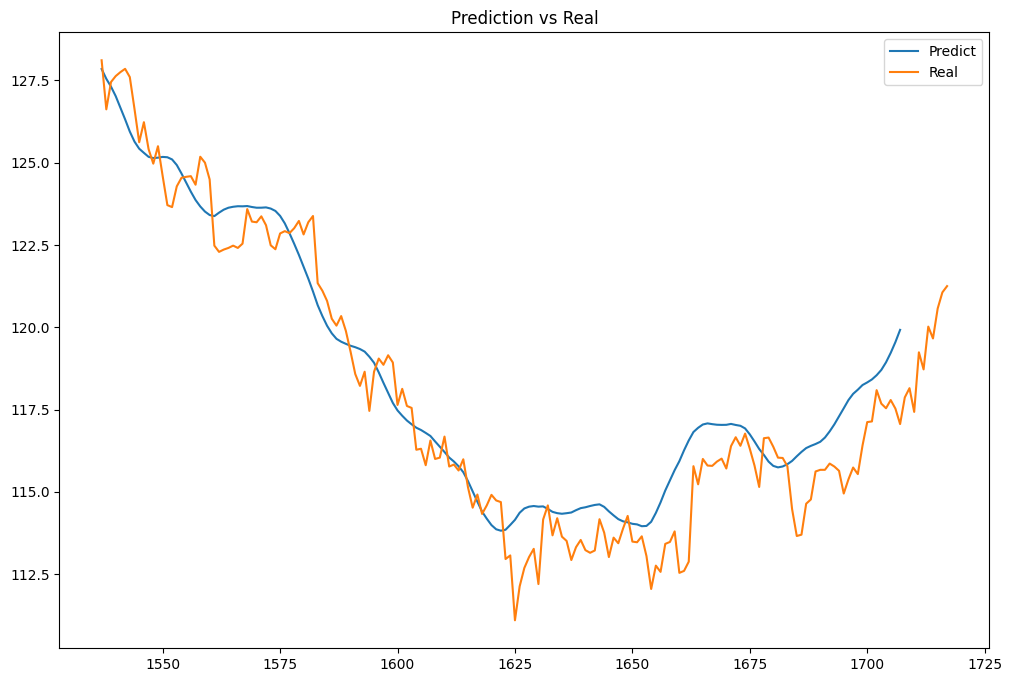

In [20]:
plt.figure(figsize=(12,8))
plt.plot(range(offset_to_test, len(df)-window), test_predict, label="Predict")
plt.plot(df[df.index >= offset_to_test]["Close"], label="Real")
plt.legend()
plt.title("Prediction vs Real")
plt.show()

Even using only the columns Open, High, Low and Close the results were interesting. So for a future work is interesting use more features in order to get best results 